<a href="https://colab.research.google.com/github/Alyssonfst/DesafioML-BAJA-SAE/blob/main/Suspensao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

base_dados = base_dados = pd.read_excel('anonymizedData.xlsx', sheet_name=4)

base_dados = base_dados.drop([ 'DP_Comprimento', 'DP_Altura do CG com relacao ao chao',
                              'DMV_Lado Direito', 'D_Relacao', 'D_Curso total da cremalheira', 'D_Inclinacao do pino mestre', 'D_Angulo de caster', 'FD_Forca no pedal a 07g ', 'FD_Curso total do pedal ',
                              'CD_Raio mínimo de curva do protótipo', 'CD_Velocidade crítica para uma curva de raio de 10 m', 'CD_Ganho de rolagem por aceleracao lateral',
                              'CD_Ganho de arfagem em aceleracao longitudinal', 'CD_Ganho de arfagem em desaceleracao longitudinal', 'DMV_Dianteira', 'SD_Dimensoes dos pneus', 'ST_Dimensoes dos pneus',
                              'MT_Relacao total_min','MT_Potência maxima do motor','MT_Torque maximo do motor',
                              'CD_Tempo para atingir velocidade maxima em asfalto', 'CD_Tempo para atingir velocidade maxima em terra batida', 'MT_Relacao total_max','CD_Velocidade maxima de 0 a 100 metros em asfalto ', 'CD_Velocidade maxima de 0 a 100 metros em terra batida '], axis=1)

base_dados['Massa Total'] = base_dados['MV_Eixo dianteiro'] + base_dados['MV_Eixo Traseiro']
base_dados = base_dados.drop(['MV_Eixo dianteiro', 'MV_Eixo Traseiro'], axis=1)

base_dados = base_dados.drop(['FD_Pressao no sistema a 07g ','FD_Diametro do disco ','FT_Pressao no sistema a 07g ','CD_Distancia de frenagem de 35 a 0 em asfalto','CD_Distancia de frenagem de 35 a 0 em terra batida','FT_Diametro do disco '], axis=1)

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DP_Entre-Eixo                 779 non-null    float64
 1   DP_Bitola Dianteira           779 non-null    float64
 2   DP_Bitola Traseira            779 non-null    float64
 3   DP_Altura                     779 non-null    float64
 4   PCG_X                         761 non-null    float64
 5   PCG_Y                         982 non-null    float64
 6   PCG_Z                         761 non-null    float64
 7   SD_Curso Positivo de projeto  120 non-null    float64
 8   SD_Curso Negativo de projeto  120 non-null    float64
 9   SD_Cambagem estatica          264 non-null    float64
 10  SD_Convergência estatica      261 non-null    float64
 11  ST_Curso Positivo de projeto  187 non-null    float64
 12  ST_Curso Negativo de projeto  120 non-null    float64
 13  ST_C

In [ ]:
base_dados

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,PCG_X,PCG_Y,PCG_Z,SD_Curso Positivo de projeto,SD_Curso Negativo de projeto,SD_Cambagem estatica,SD_Convergência estatica,ST_Curso Positivo de projeto,ST_Curso Negativo de projeto,ST_Cambagem estatica,ST_Convergência estatica,P_Suspensao,Massa Total
0,1403.343755,1464.830349,1384.813430,1650.169516,236.156465,-1.683609,142.228437,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,1,212.058914
1,1355.175580,1458.268851,1339.569317,1612.905747,414.076579,549.625844,-11.046599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,209.395536
2,NaN,NaN,NaN,NaN,NaN,-0.916274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,NaN,NaN,NaN,NaN,NaN,-25.137199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,1375.611808,1466.491046,1295.798366,1613.673946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1437.572127,1276.808399,1200.000000,1627.460455,167.601846,1.147101,221.449302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,185.392930
996,1430.487914,1257.233399,1206.112317,1701.632149,-122.285236,-0.479747,416.923548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,159.866188
997,1351.128586,1347.759384,1187.922132,1527.291742,88.497322,0.367509,497.841277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,174.672821
998,1430.000000,1300.000000,1200.000000,1600.000000,72.474134,0.011081,144.358650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,136.905211


In [ ]:
print(base_dados.info())
valores_nulos_por_coluna = base_dados.isnull().sum()

print(valores_nulos_por_coluna)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DP_Entre-Eixo                 779 non-null    float64
 1   DP_Bitola Dianteira           779 non-null    float64
 2   DP_Bitola Traseira            779 non-null    float64
 3   DP_Altura                     779 non-null    float64
 4   PCG_X                         761 non-null    float64
 5   PCG_Y                         982 non-null    float64
 6   PCG_Z                         761 non-null    float64
 7   SD_Curso Positivo de projeto  120 non-null    float64
 8   SD_Curso Negativo de projeto  120 non-null    float64
 9   SD_Cambagem estatica          264 non-null    float64
 10  SD_Convergência estatica      261 non-null    float64
 11  ST_Curso Positivo de projeto  187 non-null    float64
 12  ST_Curso Negativo de projeto  120 non-null    float64
 13  ST_C

In [ ]:
base_dados = base_dados.drop(['ST_Curso Negativo de projeto','ST_Curso Positivo de projeto','SD_Curso Negativo de projeto','SD_Curso Positivo de projeto',
                              'SD_Cambagem estatica', 'SD_Convergência estatica', 'ST_Cambagem estatica','ST_Convergência estatica'], axis=1)


In [ ]:
print(base_dados.info())
valores_nulos_por_coluna = base_dados.isnull().sum()

print(valores_nulos_por_coluna)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DP_Entre-Eixo        779 non-null    float64
 1   DP_Bitola Dianteira  779 non-null    float64
 2   DP_Bitola Traseira   779 non-null    float64
 3   DP_Altura            779 non-null    float64
 4   PCG_X                761 non-null    float64
 5   PCG_Y                982 non-null    float64
 6   PCG_Z                761 non-null    float64
 7   P_Suspensao          1000 non-null   int64  
 8   Massa Total          761 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 70.4 KB
None
DP_Entre-Eixo          221
DP_Bitola Dianteira    221
DP_Bitola Traseira     221
DP_Altura              221
PCG_X                  239
PCG_Y                   18
PCG_Z                  239
P_Suspensao              0
Massa Total            239
dtype: int64


In [ ]:
base_dados

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,PCG_X,PCG_Y,PCG_Z,P_Suspensao,Massa Total
0,1403.343755,1464.830349,1384.813430,1650.169516,236.156465,-1.683609,142.228437,1,212.058914
1,1355.175580,1458.268851,1339.569317,1612.905747,414.076579,549.625844,-11.046599,1,209.395536
2,NaN,NaN,NaN,NaN,NaN,-0.916274,NaN,1,NaN
3,NaN,NaN,NaN,NaN,NaN,-25.137199,NaN,1,NaN
4,1375.611808,1466.491046,1295.798366,1613.673946,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...
995,1437.572127,1276.808399,1200.000000,1627.460455,167.601846,1.147101,221.449302,5,185.392930
996,1430.487914,1257.233399,1206.112317,1701.632149,-122.285236,-0.479747,416.923548,5,159.866188
997,1351.128586,1347.759384,1187.922132,1527.291742,88.497322,0.367509,497.841277,5,174.672821
998,1430.000000,1300.000000,1200.000000,1600.000000,72.474134,0.011081,144.358650,5,136.905211


In [ ]:
# Supondo que 'base_dados' seja o nome do DataFrame
base_dados.dropna(thresh=base_dados.shape[1]-2, inplace=True)


In [ ]:
print(base_dados.info())
valores_nulos_por_coluna = base_dados.isnull().sum()

print(valores_nulos_por_coluna)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DP_Entre-Eixo        761 non-null    float64
 1   DP_Bitola Dianteira  761 non-null    float64
 2   DP_Bitola Traseira   761 non-null    float64
 3   DP_Altura            761 non-null    float64
 4   PCG_X                761 non-null    float64
 5   PCG_Y                761 non-null    float64
 6   PCG_Z                761 non-null    float64
 7   P_Suspensao          761 non-null    int64  
 8   Massa Total          761 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.5 KB
None
DP_Entre-Eixo          0
DP_Bitola Dianteira    0
DP_Bitola Traseira     0
DP_Altura              0
PCG_X                  0
PCG_Y                  0
PCG_Z                  0
P_Suspensao            0
Massa Total            0
dtype: int64


In [ ]:
import numpy as np

x_novos = np.array([1550, 1310, 1120, 1450, 225.32, -26.41, 138.33, 188.9])
x_novos = x_novos.reshape(1, -1)

previsoes_novos_dados = modelo_rf.predict(x_novos)

print(previsoes_novos_dados)

[2]


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DP_Entre-Eixo        761 non-null    float64
 1   DP_Bitola Dianteira  761 non-null    float64
 2   DP_Bitola Traseira   761 non-null    float64
 3   DP_Altura            761 non-null    float64
 4   PCG_X                761 non-null    float64
 5   PCG_Y                761 non-null    float64
 6   PCG_Z                761 non-null    float64
 7   P_Suspensao          761 non-null    int64  
 8   Massa Total          761 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.5 KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = np.array(base_dados.iloc[:, np.r_[0,1,2,3,4,5,6,8]])
y_train = np.array(base_dados['P_Suspensao'])

#x_train
#y_train

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train,train_size=0.65,random_state=10)

modelo_rf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=10)  # Ajuste os parâmetros conforme necessário

modelo_rf.fit(x_train, y_train)

predicoes = modelo_rf.predict(x_val)

acuracia = accuracy_score(y_val, predicoes)
print(f'Acurácia do modelo de Random Forest: {acuracia:.2f}')

Acurácia do modelo de Random Forest: 0.88


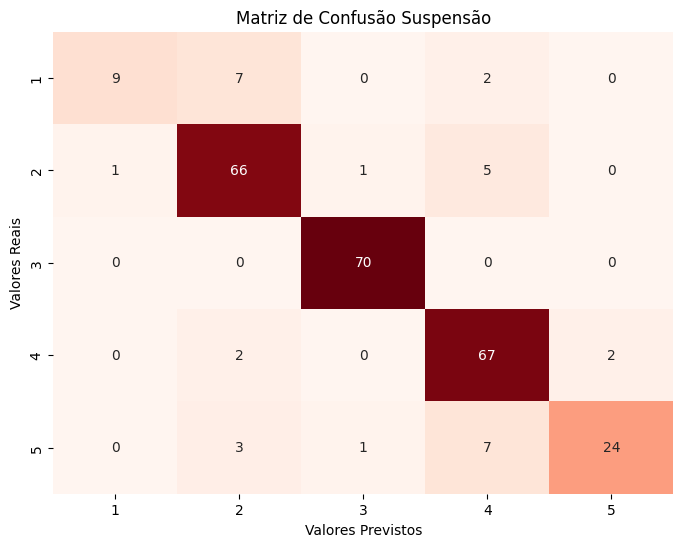

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
matriz_confusao = confusion_matrix(y_val, predicoes)

# Defina as classes reais e previstas
classes = ['1', '2', '3', '4', '5']

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Reds', fmt='g', cbar=False, xticklabels=classes, yticklabels=classes)

plt.title('Matriz de Confusão Suspensão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()


In [ ]:
x_train

array([[ 1.48650229e+03,  1.34396253e+03,  1.25861571e+03, ...,
         1.66667236e+02,  2.88530048e+02,  1.67057505e+02],
       [ 1.38069919e+03,  1.39323278e+03,  1.38879127e+03, ...,
         3.82616641e+01,  2.93859170e+02,  1.68573075e+02],
       [ 1.48475469e+03,  1.32783943e+03,  1.26704417e+03, ...,
         4.29288516e+02,  3.79296629e+02,  1.65544405e+02],
       ...,
       [ 1.41780999e+03,  1.25651993e+03,  1.23852202e+03, ...,
         7.02286995e+02,  6.49853257e+02,  1.83865828e+02],
       [ 1.42696720e+03,  1.31174358e+03,  1.24622722e+03, ...,
        -1.82156455e+00,  1.39794416e+02,  1.72482769e+02],
       [ 1.35608351e+03,  1.30077728e+03,  1.18443068e+03, ...,
         1.25185910e+00,  1.52024938e+02,  1.98079866e+02]])

In [ ]:
base_dados

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,PCG_X,PCG_Y,PCG_Z,P_Suspensao,Massa Total
0,1403.343755,1464.830349,1384.813430,1650.169516,236.156465,-1.683609,142.228437,1,212.058914
1,1355.175580,1458.268851,1339.569317,1612.905747,414.076579,549.625844,-11.046599,1,209.395536
6,1377.823365,1358.577746,1234.377233,1525.984408,64.821966,-10.347524,256.756755,1,169.719772
10,1502.041276,1548.960339,1231.113486,283.775875,115.000000,-80.000000,220.000000,1,207.541004
11,1400.000000,1361.079778,1164.411505,1511.911649,247.298781,-6.150418,273.835721,1,186.199888
...,...,...,...,...,...,...,...,...,...
994,1438.236984,1350.000000,1280.351758,1670.627824,429.163013,603.301403,497.877612,5,203.621325
995,1437.572127,1276.808399,1200.000000,1627.460455,167.601846,1.147101,221.449302,5,185.392930
996,1430.487914,1257.233399,1206.112317,1701.632149,-122.285236,-0.479747,416.923548,5,159.866188
997,1351.128586,1347.759384,1187.922132,1527.291742,88.497322,0.367509,497.841277,5,174.672821
